In [37]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')

In [3]:
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
## Removendo colunas que nao serao necessarias no treinamento
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace = True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [5]:
## Verificando dados nulos
missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [6]:
## Substituindo pela mediana
dataframe.fillna(dataframe.median(), inplace = True)
missing = dataframe.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [7]:
## Normalizando as variaveis
values = Normalizer().fit_transform(dataframe.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [8]:
## Kmeans
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter=300)

y_pred = kmeans.fit_predict(values)

In [9]:
## Avaliacao dos clusters

## Silhouette

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
silhouette

0.3486361382475878

In [10]:
## Davies-Bouldin

dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.152656566599234

In [11]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3422.84313388048

In [26]:
## Funcao para comparar cada uma das validacoes

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [13]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
s1, dbs1, calinski1 

(0.3486361382475878, 1.152656566599234, 3422.84313388048)

In [14]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
s2, dbs2, calinski2 

(0.3486361382475878, 1.152656566599234, 3422.84313388048)

In [27]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.2529922816488975 1.2192937648991482 1615.519225185937


In [28]:
## Criando um dataset com valores aleatorios para "comparacao"

random_data = np.random.rand(8950, 16) ## 8950 == quantidade de dados no dataframe // 16 = qt. de colunas
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)



0.0399428020376763 3.5263220827471726 303.7516317860531
0.3486361382475878 1.152656566599234 3422.84313388048


In [31]:
## Avaliando a estabilidade dos clusters


set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3689633507303374 1.0561114376212448 1204.0955477128857
0.3538037064965953 1.1394936582652304 1194.948634553892
0.3670418876060825 1.0984932613776763 1167.5309516803998


Text(0, 0.5, 'Valor total gasto')

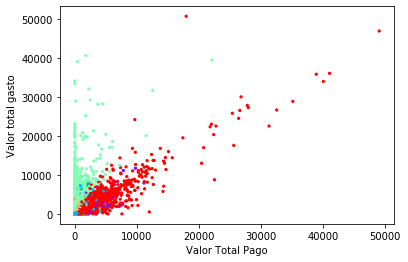

In [36]:
## Visualizando os dados

## Selecionando 2 dimensões
## purchases x payments

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Valor Total Pago')
plt.ylabel('Valor total gasto')


In [42]:
## Visualizando outras dimensoes
## Obs: Não será possível analisar os dados com base nestas visualizaçõs


dataframe.groupby('cluster').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        1825.0  2949.582558  2565.494710  114.523682  1216.893766   
1        3315.0   488.802028   936.433585    0.000000    24.078900   
2        1001.0  1748.854674  1987.975020    0.000000   486.170360   
3        1315.0  2719.616192  2230.337145    1.691842  1035.647960   
4        1494.0  1118.998658  1627.007380    0.000000   212.520398   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1843.308668  4021.881912  18495.558550            1825.0  0.996860   
1          85.881798   448.965814   9630.367575            3315.0  0.780972   
2        1060.422892  2241.092286  14581.459140            1001.0  0.858535   
3        2080.312991  3782.283750  12856.152510            1315.0  0.906890   
4         543.237203  1337.212684  19043.138560            1494.0  0.931343   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1961.161822  76406.207520           1825.0  0.001062   
1        ...       260.172137   3933.230932           3315.0  0.244951   
2        ...       931.105425  21235.065300           1001.0  0.129974   
3        ...      1164.174894   8644.138069           1315.0  0.007450   
4        ...       531.787024  18621.013310           1494.0  0.282392   

                                                           
              std  min  25%       50%       75%       max  
cluster                                                    
0        0.013400  0.0  0.0  0.000000  0.000000  0.416667  
1        0.345886  0.0  0.0  0.000000  0.436507  1.000000  
2        0.198876  0.0  0.0  0.083333  0.166667  1.000000  
3        0.041141  0.0  0.0  0.000000  0.000000  0.600000  
4        0.369194  0.0  0.0  0.083333  0.567461  1.000000  

[5 rows x 128 columns]

In [43]:
## Identificando a "posicao" dos centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[5.34719561e-01 3.07483975e-04 9.40143076e-02 4.50451970e-02
  4.90841876e-02 8.42618546e-02 1.03569613e-04 3.28730575e-05
  7.70242320e-05 3.86267235e-05 6.70671828e-04 2.24080860e-03
  6.47510299e-01 1.99941575e-01 3.11248055e-01 2.85575884e-07]
 [7.41435057e-02 2.30598606e-04 1.22644337e-01 4.91336388e-02
  7.36112623e-02 2.02012160e-02 1.72105136e-04 3.41056055e-05
  1.39398511e-04 7.56585643e-06 1.18718703e-04 2.87194118e-03
  9.43090102e-01 1.54954100e-01 5.72048927e-02 7.55013476e-05]
 [2.27283461e-01 2.12919599e-04 6.90552841e-02 3.82103280e-02
  3.08505405e-02 3.64415621e-01 5.84848743e-05 2.24756747e-05
  3.97948056e-05 5.90776324e-05 1.43098394e-03 1.30916105e-03
  5.19057140e-01 6.31517578e-01 1.13827521e-01 3.10899781e-05]
 [3.92225952e-01 2.21961434e-04 4.08966140e-02 2.41375044e-02
  1.67632013e-02 4.69796685e-01 4.57220814e-05 1.60226742e-05
  3.02199798e-05 7.74424778e-05 1.73808813e-03 7.90301737e-04
  7.16380049e-01 1.49362355e-01 1.32273009e-01 2.04476303e-06]
 [1.

In [45]:
## Calculando a variancia

max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0276
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0219
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0037
CASH_ADVANCE 
0.0351
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0210
PAYMENTS 
0.0348
MINIMUM_PAYMENTS 
0.0078
PRC_FULL_PAYMENT 
0.0000


In [46]:
## Selecionando somente os atributos que serão úteis nas analises
## foi considerado os atributos com somente um zero nas casas decimais

## BALANCE 0.0276
## PURCHASES 0.0219
## CASH_ADVANCE 0.0351
## CREDIT_LIMIT 0.0210
## PAYMENTS 0.0348 


In [51]:
## Media de cada m dos atributos
description = dataframe.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                                          'PAYMENTS']

n_clients = description.size() ## qt. de clientes em cada cluster
description = description.mean() ## media

## Criando uma nova coluna na variavel descripton
description['n_clients'] = n_clients

description

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,2949.582558,559.479945,573.495675,3730.000000,1050.324877,1825
1,488.802028,640.242015,126.097601,5178.415315,827.711487,3315
2,1748.854674,531.250120,3064.439069,3914.956256,4961.223005,1001
3,2719.616192,251.530144,3004.448265,4782.091255,1008.915227,1315
4,1118.998658,3328.438133,186.010928,4044.718977,3050.885706,1494


In [52]:
## % do pagamento da fatura (exemplo: 1 == 100%, ou seja, cliente pagou 100% da fatura)

dataframe.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1825.0,0.001062,0.013400,0.0,0.0,0.000000,0.000000,0.416667
1,3315.0,0.244951,0.345886,0.0,0.0,0.000000,0.436507,1.000000
2,1001.0,0.129974,0.198876,0.0,0.0,0.083333,0.166667,1.000000
3,1315.0,0.007450,0.041141,0.0,0.0,0.000000,0.000000,0.600000
4,1494.0,0.282392,0.369194,0.0,0.0,0.083333,0.567461,1.000000
